Basic functions<br>
Special functions (scipy.special) 物理学数值计算<br>
Integration (scipy.integrate)<br>
Optimization (scipy.optimize)<br>
Interpolation (scipy.interpolate)<br>
Fourier Transforms (scipy.fftpack)<br>
Signal Processing (scipy.signal)<br>
Linear Algebra (scipy.linalg)<br>
Sparse Eigenvalue Problems with ARPACK<br>
Compressed Sparse Graph Routines (scipy.sparse.csgraph)<br>
Spatial data structures and algorithms (scipy.spatial)<br>
Statistics (scipy.stats)<br>
Multidimensional image processing (scipy.ndimage)<br>
File IO (scipy.io)<br>
https://docs.scipy.org/doc/scipy/reference/

### 1. 矩阵操作

In [2]:
import numpy as np
from scipy import linalg 

In [4]:
A = np.array([[1,2,3],[4,5,6],[7,8,8]])

In [5]:
linalg.inv(A)

array([[-2.66666667,  2.66666667, -1.        ],
       [ 3.33333333, -4.33333333,  2.        ],
       [-1.        ,  2.        , -1.        ]])

In [6]:
A.dot(linalg.inv(A))

array([[ 1.00000000e+00,  8.88178420e-16,  2.22044605e-16],
       [ 0.00000000e+00,  1.00000000e+00, -4.44089210e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [1]:
linalg.det(A) 

NameError: name 'np' is not defined

In [6]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 8]])

In [5]:
P, L, U = linalg.lu(A) 
print(P) 
print(L) 
print(U) 

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
[[7.         8.         8.        ]
 [0.         0.85714286 1.85714286]
 [0.         0.         0.5       ]]


### 2. 稀疏矩阵
https://docs.scipy.org/doc/scipy/reference/sparse.html#module-scipy.sparse

In [2]:
from scipy.sparse import csc_matrix
csc_matrix((3, 4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [3]:
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csc_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]], dtype=int64)

In [4]:
indptr = np.array([0, 2, 3, 6]) # indices中第几个数再第几行，区间左开右闭
indices = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
# indptr:0-2 indices:0,2 data:1,2
# indptr:2-3 indices:2 data:3
# indptr:3-6 indices:0,1,2 data:4,5,6
csc_matrix((data, indices, indptr), shape=(3, 3)).toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]])

### 3. 统计学

**概率分布**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from scipy.stats import norm

In [7]:
n1 = norm(0,1)
n2 = norm(2,0.1)

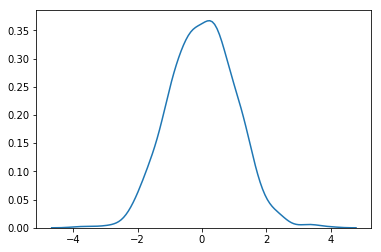

In [8]:
sns.kdeplot(n1.rvs(1000))

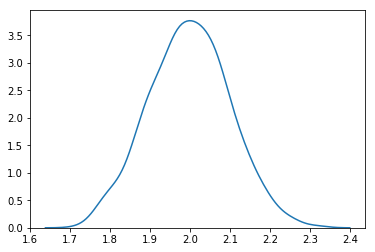

In [9]:
sns.kdeplot(n2.rvs(1000))

In [10]:
n2.cdf(2)

0.5

**假设检验**

In [11]:
from scipy import stats
np.random.seed(7654567)  # fix seed to get the same result

In [12]:
rvs = stats.norm.rvs(loc=5, scale=10, size=(50,2))

单样本检验

In [13]:
stats.ttest_1samp(rvs,5.0) # p>0.05，不拒绝

Ttest_1sampResult(statistic=array([-0.68014479, -0.04323899]), pvalue=array([0.49961383, 0.96568674]))

In [14]:
stats.ttest_1samp(rvs,0.0) # p<0.05，拒绝

Ttest_1sampResult(statistic=array([2.77025808, 4.11038784]), pvalue=array([0.00789095, 0.00014999]))

In [15]:
np.random.seed(12345678)

双独立样本：相同方差

In [16]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=0.26833823296238857, pvalue=0.788494433695651)

双独立样本：不同方差

In [17]:
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500)
stats.ttest_ind(rvs1, rvs3, equal_var = False)

Ttest_indResult(statistic=-0.46580283298287956, pvalue=0.6414964624656874)

### 官方文档
https://docs.scipy.org/doc/scipy/reference/index.html